In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split

In [2]:
labels_csv = pd.read_csv("../data/dogBreed-detection-TensorFlow-transferLearning-mobilenet-v2/labels.csv")
print(labels_csv.describe())
labels_csv.head()

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [3]:
labels_csv["breed"].value_counts()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: count, Length: 120, dtype: int64

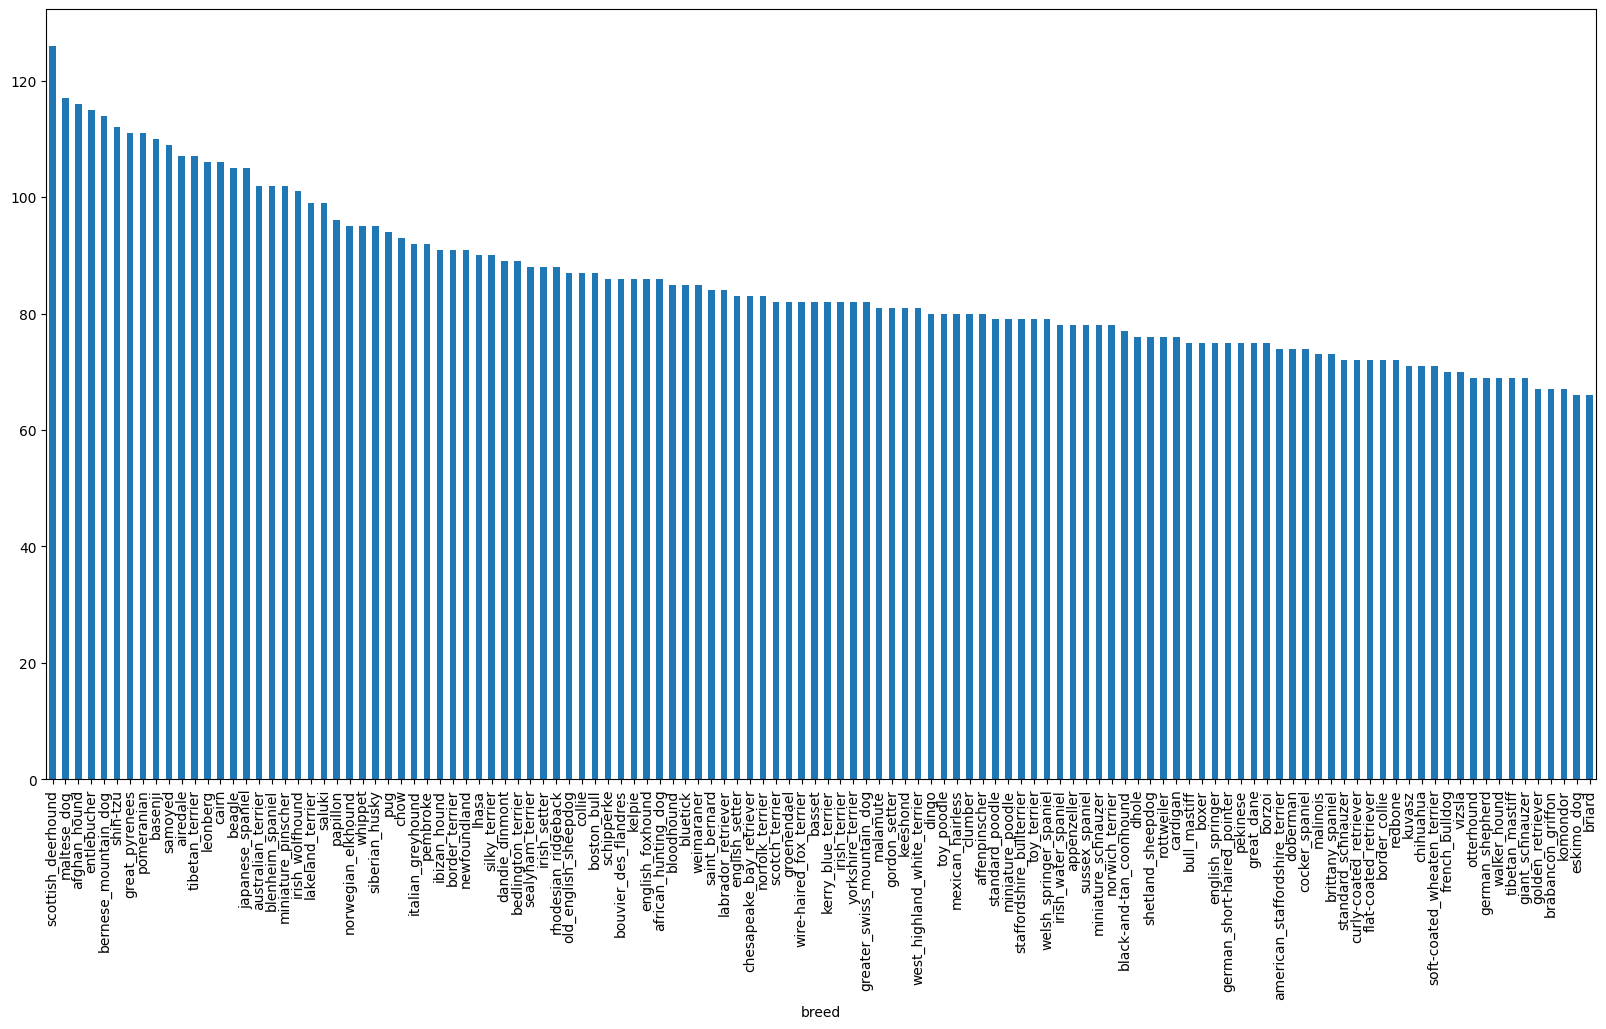

In [4]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10));

In [5]:
# nunmber of images per class
val_counts_breed = labels_csv["breed"].value_counts()

In [6]:
# Min Max and Median count of images per class (breed)
print(f"Minimum number of pictures for a breed is : {np.min(val_counts_breed)}")
print(f"Maximum number of pictures for a breed is : {np.max(val_counts_breed)}")
print(f"Median nunmber of images per class is : {val_counts_breed.median()}")


Minimum number of pictures for a breed is : 66
Maximum number of pictures for a breed is : 126
Median nunmber of images per class is : 82.0


In [7]:
# Showing images with IPythn
from IPython.display import Image

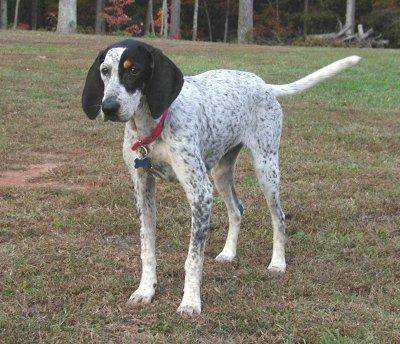

In [8]:
Image("../data/dogBreed-detection-TensorFlow-transferLearning-mobilenet-v2/train/00214f311d5d2247d5dfe4fe24b2303d.jpg")

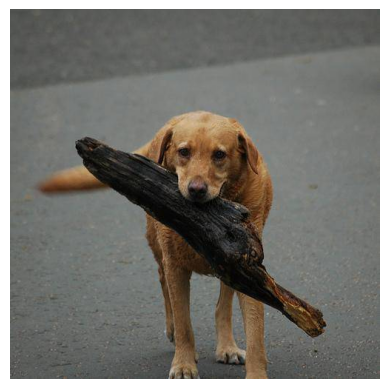

In [9]:
# Showing images with matplotlib imread
import matplotlib.image as mpimg
img = mpimg.imread("../data/dogBreed-detection-TensorFlow-transferLearning-mobilenet-v2/train/0021f9ceb3235effd7fcde7f7538ed62.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

## getting images
let's get a list of all of our image file path names

In [10]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [11]:
# Create path names from id in labels_csv
filenames = [fname for fname in labels_csv["id"]]

In [12]:
# Checking first 5
filenames[:5] , type(filenames)

(['000bec180eb18c7604dcecc8fe0dba07',
  '001513dfcb2ffafc82cccf4d8bbaba97',
  '001cdf01b096e06d78e9e5112d419397',
  '00214f311d5d2247d5dfe4fe24b2303d',
  '0021f9ceb3235effd7fcde7f7538ed62'],
 list)

In [13]:
# Making filenames to point into right path with right extension
filenames = ["../data/dogBreed-detection-TensorFlow-transferLearning-mobilenet-v2/train/" + fname + ".jpg" for fname in labels_csv['id']]
filenames[:5]

['../data/dogBreed-detection-TensorFlow-transferLearning-mobilenet-v2/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '../data/dogBreed-detection-TensorFlow-transferLearning-mobilenet-v2/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '../data/dogBreed-detection-TensorFlow-transferLearning-mobilenet-v2/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '../data/dogBreed-detection-TensorFlow-transferLearning-mobilenet-v2/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '../data/dogBreed-detection-TensorFlow-transferLearning-mobilenet-v2/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [14]:
# Check whether the number of filenames matches the actual files
import os
if os.path.exists(filenames[0]):
  print("path exists")
else:
  print("path does not exist")

if len(os.listdir("../data/dogBreed-detection-TensorFlow-transferLearning-mobilenet-v2/train/")) == len(filenames):
  print("number of files matches")
else:
  print("number of files does not match")

path exists
number of files matches


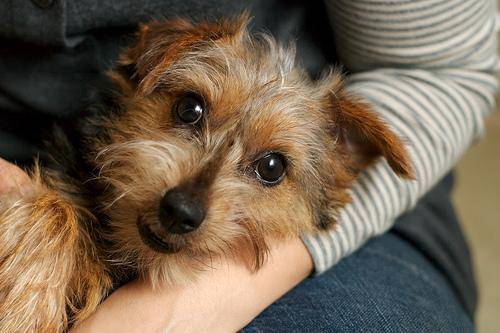

In [15]:
Image(filenames[8705])

In [16]:
labels_csv["breed"][8705]

'norfolk_terrier'

In [17]:
# Creating a numpy array of labels
labels = np.array(labels_csv["breed"])

# Another way of doing the same thing
#labels = labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [18]:
len(labels)

10222

In [19]:
# Checking the number of labels matches the number of files
len(labels) == len(filenames)

True

In [20]:
# Creating unique_breeds out of labels 
unique_breeds = np.unique(labels)
len(unique_breeds), unique_breeds[:5]

(120,
 array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
        'american_staffordshire_terrier'], dtype=object))

In [21]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [22]:
 len(boolean_labels)

10222

## Creating validation set

In [23]:
X = filenames
y = boolean_labels

In [24]:
# Setting the number for experimenting
NUM_IMAGES = 1000

In [25]:
# Spliting our data into train and validation set with total size of NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES], test_size=0.2, random_state=42)

In [26]:
# Checking the len of our splited data
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

# Turning images into Tensors
we're going to write a function to do few things :
1. take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable 'image'
3. Turn our 'image' (jpg) into Tensors
4. Normalize our 'image'
5. Resize the 'image' to be a shape of (224, 224) for mobilenet-v2
6. Return the modified 'image'

Before we do, let's see what importing an image looks like.

In [27]:
# Converting image to numpy array
image = imread(filenames[50])
image.shape

(240, 320, 3)

In [28]:
tf.constant(image)

<tf.Tensor: shape=(240, 320, 3), dtype=uint8, numpy=
array([[[176, 163, 146],
        [157, 144, 127],
        [148, 135, 118],
        ...,
        [109,  94,  97],
        [ 76,  60,  70],
        [ 75,  59,  70]],

       [[168, 155, 138],
        [148, 135, 118],
        [150, 137, 120],
        ...,
        [100,  86,  86],
        [ 64,  49,  56],
        [ 86,  70,  80]],

       [[149, 133, 117],
        [128, 112,  96],
        [144, 131, 114],
        ...,
        [108,  94,  93],
        [ 73,  57,  60],
        [ 67,  50,  56]],

       ...,

       [[ 92,  75,  65],
        [ 87,  70,  60],
        [ 76,  62,  53],
        ...,
        [253, 241, 217],
        [255, 241, 220],
        [255, 243, 222]],

       [[ 89,  72,  62],
        [ 86,  69,  59],
        [ 77,  63,  52],
        ...,
        [252, 241, 221],
        [251, 238, 221],
        [249, 236, 219]],

       [[ 85,  68,  58],
        [ 87,  70,  60],
        [ 83,  69,  58],
        ...,
        [255, 245, 22

In [29]:
# Define image size
IMG_SIZE = 224

# Creating a function for preprocessing images
def image_process(image_path, img_size=IMG_SIZE):
  """
  takes an image file path and turn it into a Tensor
  """
  # Read an image file
  img = tf.io.read_file(image_path)

  # Turn the jpg image into numerical tensors with three color channels (Red, Green, Blue)
  img = tf.image.decode_jpeg(img, channels=3)

  # Normalize color channel values
  img = tf.image.convert_image_dtype(img, tf.float32)

  # Resize the image to our desired size (224,224) IMG_SIZE
  img = tf.image.resize(img, size=[img_size, img_size])

  return img


## Turning our data into batches

In [30]:
# Creating a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
   take an image path name and label and returns a tuple of resized and tensored image like : (image, label)
  """
  img = image_process(image_path)
  return img, label

In [31]:
# Demo of above function
(image_process(X[111]), tf.constant(y[111]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.69803923, 0.8078432 , 0.86274517],
         [0.69803923, 0.8078432 , 0.86274517],
         [0.69803923, 0.8078432 , 0.86274517],
         ...,
         [0.8863342 , 0.5757777 , 0.50835854],
         [0.7951043 , 0.6108087 , 0.5642088 ],
         [0.65276986, 0.6393074 , 0.6253041 ]],
 
        [[0.69803923, 0.8078432 , 0.86274517],
         [0.69803923, 0.8078432 , 0.86274517],
         [0.69803923, 0.8078432 , 0.86274517],
         ...,
         [0.93375236, 0.61523837, 0.5389947 ],
         [0.769212  , 0.5672812 , 0.50924337],
         [0.5617812 , 0.5164014 , 0.4847893 ]],
 
        [[0.69803923, 0.8078432 , 0.86274517],
         [0.69803923, 0.8078432 , 0.86274517],
         [0.69803923, 0.8078432 , 0.86274517],
         ...,
         [0.97650546, 0.655612  , 0.5697402 ],
         [0.81551045, 0.5819486 , 0.49941185],
         [0.52381814, 0.42865178, 0.3647076 ]],
 
        ...,
 
        [[0.31265897, 0.40677664

Now that we can create a tuple of tensors in the form of (image, label) lets create a function to trun all of our data (X and y) into batches

In [32]:
tf.data.Dataset.from_tensor_slices((tf.constant(X)))

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [33]:
# Define the batch size (32)
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
    Creates batches of data out of image (X) and label (y) pairs.
    Shuffles the data if it's training data but doesn't shuffle it if it's validation data
    Also accepts test data as input (no labels y=None, because test data has no labels OC)
  """
  # If the data is a test dataset, we probably dont have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # Only file paths
    data_batch = data.map(image_process).batch(BATCH_SIZE)
    print("Created test data batches.")

  # If the is a valid dataset we dont need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    print("Created validation data batches.")

  else:
    print("Creating training data batches...")
    # Trun file paths and labels into tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    data = data.shuffle(buffer_size=len(X))
    # Create image label tuples (image, label) also turn the image path into preprocessed image
    data = data.map(get_image_label)
    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
    print("Created training data batches.")


  return data_batch

In [34]:
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Created training data batches.
Creating validation data batches...
Created validation data batches.


In [35]:
# Check out data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

In [36]:
# Creating a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  This function plots data in batches of 25 images
  """

  # Setup the figure
  plt.figure(figsize=(15,10))
  # loop through 25
  for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.axis("off")
    plt.title(unique_breeds[labels[i].argmax()])

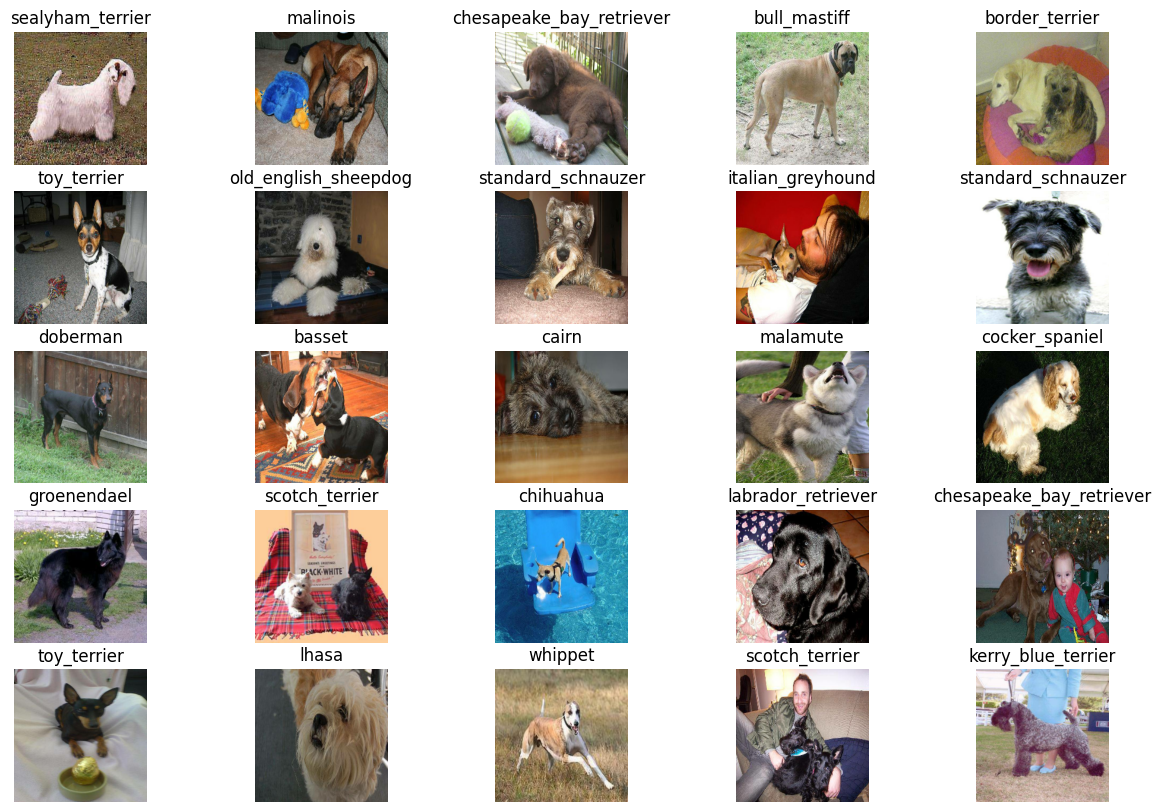

In [37]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

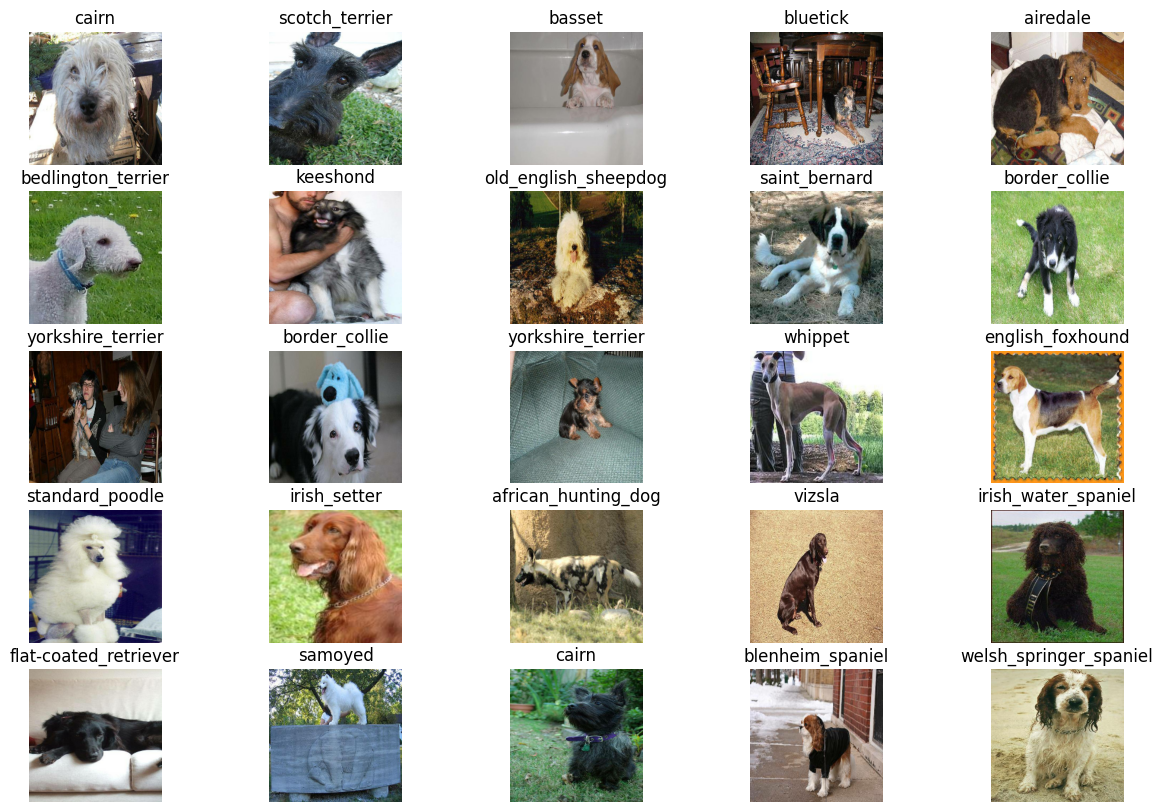

In [38]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building model
>input shape
>
>output shape
>
>URL

In [39]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from tensorflow hub
URL = "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/tf2-preview-classification/4"

Now lets put all of that in keras deep learning model

* lets create a function which takes input shape, output shape and the model
and define layers in keras model in sequential fashion

* Compiles the model
* builds the model
* returns the model

since in create_model below when i use hub.KerasLayer i get an error i had to install tf_keras and create our model with this instead of tf

In [40]:
!pip install tf_keras
import tf_keras as tfk

In [62]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=URL):
  print("Building model with:", model_url)

  # Setup the model layers
  model = tfk.Sequential([
        hub.KerasLayer(model_url),
                       tfk.layers.Dense(units=output_shape, activation='softmax')
                       ])

  # Compile the model
  model.compile(
      loss=tfk.losses.CategoricalCrossentropy(), 
      optimizer=tfk.optimizers.Adam(), 
      metrics=['accuracy'] 
  )

  # Build the model
  model.build(input_shape)

  return model

In [63]:
model = create_model()
model.summary()

Building model with: https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/tf2-preview-classification/4
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_7 (KerasLayer)  (None, 1001)              3540265   
                                                                 
 dense_7 (Dense)             (None, 120)               120240    
                                                                 
Total params: 3660505 (13.96 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


 ## Creating callbacks


In [64]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [65]:
# We need date time to trac our experiment
import datetime

In [66]:
# Create a function to build tensorboard callback
def create_tensorboard_callback():
  # Creating a log directory for tensorboard logs
  logdir = os.path.join("../data/dogBreed-detection-TensorFlow-transferLearning-mobilenet-v2/logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

  return tf.keras.callbacks.TensorBoard(logdir)

In [67]:
# Creating an early stopping callback function
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3)

In [83]:
# Training a model (on subset of data)
NUM_EPOCHS = 10 

In [84]:
# Check to make sure we still using GPU
print("yes :)" if tf.config.list_physical_devices("GPU") else "no :(")

no :(


In [85]:
# Creating a function to train a model
def train_model():
  """
  Trains a given model and return the trained version
  """

  # Create model
  model = create_model()

  # Create a tensorboard callback
  tensorboard = create_tensorboard_callback()

  # fiting the model
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            #callbacks=[tensorboard, early_stopping]
           )
  # return the fited model
  return model

In [86]:
model = train_model()

Building model with: https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/tf2-preview-classification/4
Epoch 1/10
25/25 [==============================] - 11s 317ms/step - loss: 4.4374 - accuracy: 0.1175 - val_loss: 3.1531 - val_accuracy: 0.3250
Epoch 2/10
25/25 [==============================] - 7s 296ms/step - loss: 1.4670 - accuracy: 0.7237 - val_loss: 2.0363 - val_accuracy: 0.5150
Epoch 3/10
25/25 [==============================] - 7s 292ms/step - loss: 0.4923 - accuracy: 0.9438 - val_loss: 1.5937 - val_accuracy: 0.5900
Epoch 4/10
25/25 [==============================] - 7s 292ms/step - loss: 0.2202 - accuracy: 0.9900 - val_loss: 1.4346 - val_accuracy: 0.6250
Epoch 5/10
25/25 [==============================] - 7s 297ms/step - loss: 0.1280 - accuracy: 0.9975 - val_loss: 1.3622 - val_accuracy: 0.6400
Epoch 6/10
25/25 [==============================] - 7s 294ms/step - loss: 0.0878 - accuracy: 1.0000 - val_loss: 1.3366 - val_accuracy: 0.6400
Epoch 7/10
25/25 [=================

In [87]:
# Evaluating predictions using a trained model
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 2s 201ms/step


array([[5.1633180e-03, 2.2631467e-03, 1.5930552e-04, ..., 4.2450229e-05,
        1.5871420e-04, 8.9277243e-03],
       [2.4163075e-04, 5.0047059e-02, 6.9676773e-03, ..., 4.0883964e-04,
        4.9395841e-03, 1.8451206e-05],
       [7.9389501e-08, 5.5877608e-05, 1.3193486e-05, ..., 4.6183228e-05,
        3.5465316e-06, 7.0137146e-04],
       ...,
       [3.4743076e-05, 5.4037355e-05, 2.3650551e-05, ..., 7.2734247e-06,
        4.3844419e-05, 5.5412271e-05],
       [1.0063197e-04, 7.2608514e-06, 1.0999912e-05, ..., 1.5560336e-05,
        5.0533275e-05, 2.2906528e-03],
       [5.8847398e-04, 1.4946094e-06, 1.2748783e-03, ..., 6.4483070e-04,
        2.6058003e-03, 3.3894053e-04]], dtype=float32)

In [88]:
predictions.shape

(200, 120)

In [90]:
# Information about one of our indexes 
index = 7
print(predictions[index])
print(f"Max value: {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[5.06996257e-05 4.57570801e-04 1.13882570e-05 2.75159782e-05
 3.28452443e-05 1.24840672e-05 1.13975248e-05 1.30582721e-05
 9.04947228e-06 2.14298325e-05 3.15890909e-04 5.82005705e-05
 4.86776116e-06 9.74891464e-06 3.57053068e-05 7.37000437e-06
 1.07358082e-05 1.52844532e-05 5.27093164e-07 1.37092338e-05
 2.61123088e-04 6.79312870e-06 3.29790328e-06 1.64441481e-05
 8.32957539e-07 4.77845788e-05 4.89529384e-07 1.42639410e-05
 6.58322233e-06 4.67965606e-07 2.20776747e-06 1.00616529e-03
 1.22391997e-04 2.57995162e-05 8.17597936e-07 1.21489975e-05
 3.13653072e-05 2.32442426e-06 2.11898459e-05 8.52198809e-06
 7.35306166e-05 4.98402824e-06 6.51666005e-06 5.69787735e-05
 5.68774340e-06 1.32401628e-05 1.45762660e-05 5.33019283e-06
 1.51130544e-05 3.37519009e-06 4.59528820e-07 1.68702536e-05
 4.03554412e-03 8.61949447e-05 4.86783074e-06 2.02660635e-06
 7.87626391e-07 5.01149589e-06 1.80190400e-05 4.89139056e-04
 3.07932567e-07 7.72934982e-06 6.58285171e-06 1.13423721e-06
 8.48171112e-05 1.081061

Lets create a model to show above information and the actual image

In [91]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on array of prediction probabilities
pred_label = get_pred_label(predictions[7])
pred_label

'old_english_sheepdog'

In [92]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [93]:
# Since val_data is in batch dataset we need to unbatchify to compare predictions to validation labels
def unbatchify(data):
  """
  Takes batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels
  """
  imgs = []
  lbls = []

  for img, lbl in data.unbatch().as_numpy_iterator():
    imgs.append(img)
    lbls.append(unique_breeds[np.argmax(lbl)])

  return imgs, lbls

Now we have ways to get :
* Prediction labels
* Validation labels
* Validation images

Let's make all of this visual!!!


In [94]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n
  """
  pred_prob, true_label, img = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)



In [95]:
val_images, val_labels = unbatchify(val_data)


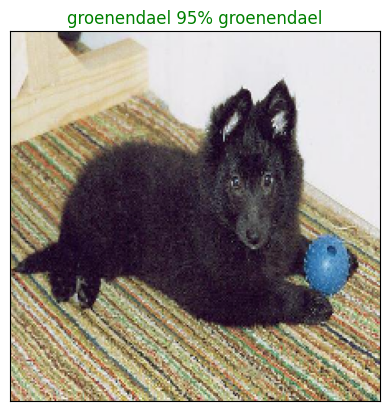

In [96]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=77)

In [97]:
# Creating a function to view model top 10 predictions
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  View the prediction, ground truth label and image for sample n
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 predictions confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]

  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plots
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass



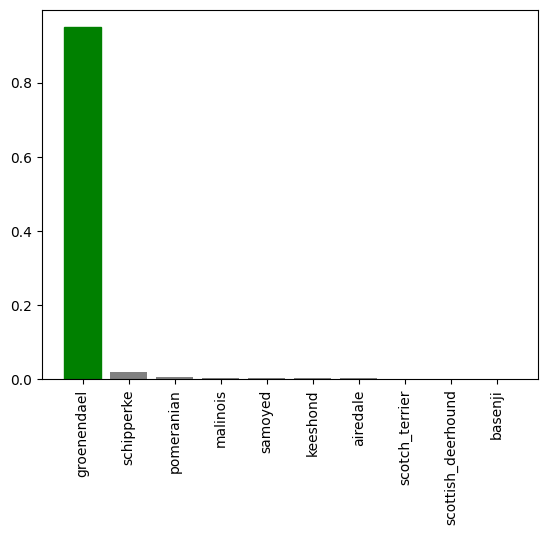

In [98]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=77)

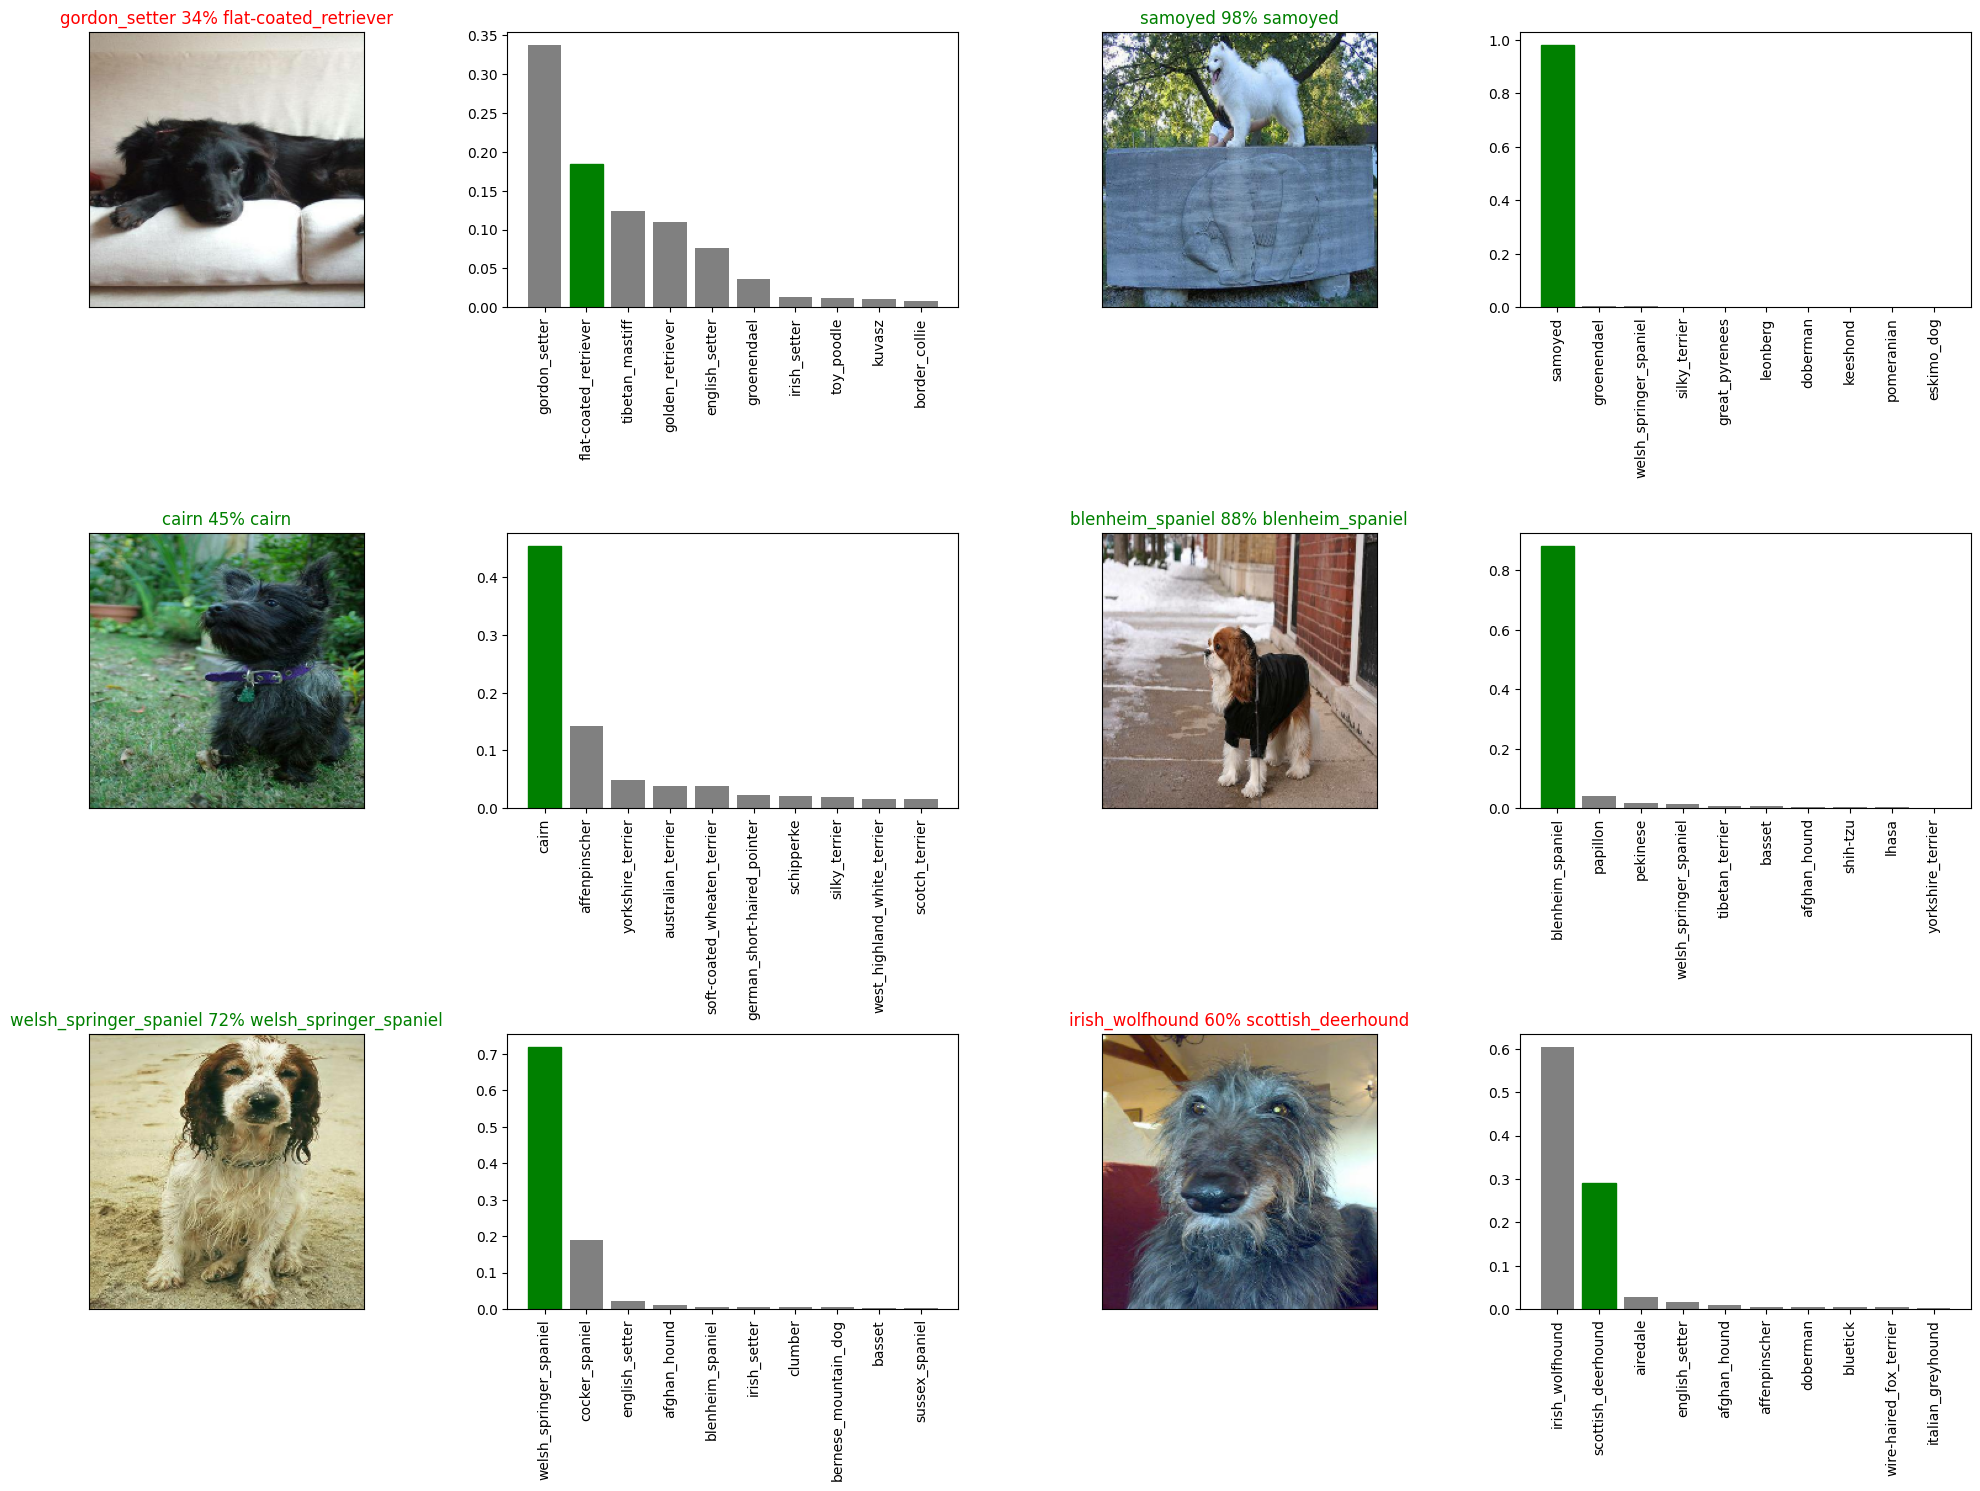

In [99]:
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [101]:
# A Function to save our model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity
  """
  modeldir = os.path.join("../data/dogBreed-detection-TensorFlow-transferLearning-mobilenet-v2/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  model_path = modeldir + "-" + suffix + ".h5"
  model.save(model_path)
  return model_path

In [109]:
# A Function to load our model
def load_model(model_path):
  """
  Loads a saved model from a specified path
  """
  print(f"Loading saved model from: {model_path}")
  model = tfk.models.load_model(model_path,
                                    custom_objects={"KerasLayer":hub.KerasLayer})
  return model


In [107]:
# Testing our fuctions for save and load models
save_model(model, suffix="mobilenetv2-1000img-Adam2")

'../data/dogBreed-detection-TensorFlow-transferLearning-mobilenet-v2/models\\20241023-144241-mobilenetv2-1000img-Adam2.h5'

In [110]:
loaded_model = load_model('../data/dogBreed-detection-TensorFlow-transferLearning-mobilenet-v2/models/20241023-144241-mobilenetv2-1000img-Adam2.h5')

Loading saved model from: ../data/dogBreed-detection-TensorFlow-transferLearning-mobilenet-v2/models/20241023-144241-mobilenetv2-1000img-Adam2.h5


In [111]:
model.evaluate(val_data)

7/7 [==============================] - 1s 197ms/step - loss: 1.2667 - accuracy: 0.6700


[1.2666791677474976, 0.6700000166893005]

In [112]:
loaded_model.evaluate(val_data)

7/7 [==============================] - 2s 199ms/step - loss: 1.2667 - accuracy: 0.6700


[1.2666791677474976, 0.6700000166893005]

In [113]:
# Train a model on full dataset
len(X), len(y)

(10222, 10222)

In [114]:
X[:5]

['../data/dogBreed-detection-TensorFlow-transferLearning-mobilenet-v2/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '../data/dogBreed-detection-TensorFlow-transferLearning-mobilenet-v2/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '../data/dogBreed-detection-TensorFlow-transferLearning-mobilenet-v2/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '../data/dogBreed-detection-TensorFlow-transferLearning-mobilenet-v2/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '../data/dogBreed-detection-TensorFlow-transferLearning-mobilenet-v2/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [115]:
X_train[:5]

['../data/dogBreed-detection-TensorFlow-transferLearning-mobilenet-v2/train/00bee065dcec471f26394855c5c2f3de.jpg',
 '../data/dogBreed-detection-TensorFlow-transferLearning-mobilenet-v2/train/0d2f9e12a2611d911d91a339074c8154.jpg',
 '../data/dogBreed-detection-TensorFlow-transferLearning-mobilenet-v2/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
 '../data/dogBreed-detection-TensorFlow-transferLearning-mobilenet-v2/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
 '../data/dogBreed-detection-TensorFlow-transferLearning-mobilenet-v2/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg']

In [116]:
len(X_train)

800

In [117]:
y[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [118]:
# Create a data batch with full dataset
full_data = create_data_batches(X, y)

Creating training data batches...
Created training data batches.


In [119]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [120]:
# Create a model for full model
full_model = create_model()

Building model with: https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/tf2-preview-classification/4


In [125]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()

# No validation set when training on all the data, so we can't monitor validation
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [127]:
# Fit the full model
full_model.fit(x=full_data,
               epochs=30,
               # callbacks=[full_model_tensorboard, full_model_early_stopping]
              )


Epoch 1/30
320/320 [==============================] - 85s 263ms/step - loss: 1.2738 - accuracy: 0.6783
Epoch 2/30
320/320 [==============================] - 74s 231ms/step - loss: 0.3715 - accuracy: 0.8876
Epoch 3/30
320/320 [==============================] - 74s 230ms/step - loss: 0.2206 - accuracy: 0.9378
Epoch 4/30
320/320 [==============================] - 75s 233ms/step - loss: 0.1434 - accuracy: 0.9654
Epoch 5/30
320/320 [==============================] - 74s 230ms/step - loss: 0.0965 - accuracy: 0.9796
Epoch 6/30
320/320 [==============================] - 74s 230ms/step - loss: 0.0698 - accuracy: 0.9872
Epoch 7/30
320/320 [==============================] - 74s 230ms/step - loss: 0.0526 - accuracy: 0.9918
Epoch 8/30
320/320 [==============================] - 74s 231ms/step - loss: 0.0403 - accuracy: 0.9956
Epoch 9/30
320/320 [==============================] - 74s 230ms/step - loss: 0.0355 - accuracy: 0.9952
Epoch 10/30
320/320 [==============================] - 74s 230ms/step - l

In [128]:
save_model(full_model, suffix="mobilenetv2-fulldata-Adam")

'../data/dogBreed-detection-TensorFlow-transferLearning-mobilenet-v2/models\\20241023-152402-mobilenetv2-fulldata-Adam.h5'